In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
some_digit = X[0]

In [7]:
some_digit_image = some_digit.reshape(28, 28)

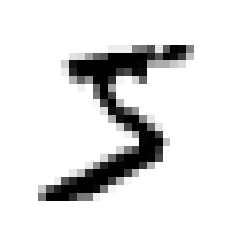

In [8]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
#Training a binary classifier

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [12]:
# Using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
#Performance Measures
#Measuring Accuracy Using Cross_Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
## TN | FP
## FN | TP

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [17]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [18]:
# Precision = TP/(TP + FP)
# Recall = true positive rate(TRP) = TP/(TP + FN)
from sklearn.metrics import recall_score, precision_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [20]:
#F1 = harmonic mean of precision and recall = 2 * (pr * rec)/(pr + rec) = TP/(TP + (FN+FP)/2)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [21]:
# Pres/Rec trade-off
y_scores = sgd_clf.decision_function([some_digit])

In [22]:
y_scores

array([2164.22030239])

In [23]:
threshold = 0
y_some_diigt_pred = (y_scores > threshold)
y_some_diigt_pred

array([ True])

In [24]:
threshold = 8000
y_some_diigt_pred = (y_scores > threshold)
y_some_diigt_pred

array([False])

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [26]:
from sklearn.metrics import precision_recall_curve
precisons, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

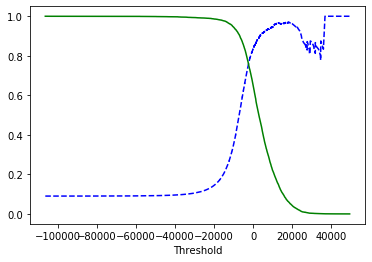

In [27]:
def plot_pres_rec_vs_threshhold(precisons, recalls, thresholds):
    plt.plot(thresholds, precisons[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")
    plt.xlabel("Threshold")

plot_pres_rec_vs_threshhold(precisons, recalls, thresholds)

In [28]:
import numpy as np
threshold_90_precisions = thresholds[np.argmax(precisons >= 0.90)]
threshold_90_precisions

3370.0194991439594

In [29]:
y_train_pred = (y_scores >= threshold_90_precisions)
y_train_pred

array([False, False, False, ...,  True, False, False])

In [30]:
precision_score(y_train_5, y_train_pred)


0.9000345901072293

In [31]:
recall_score(y_train_5, y_train_pred)

0.4799852425751706

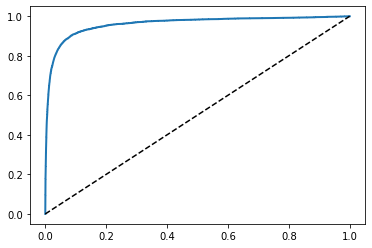

In [34]:
# TO:DO The ROC Curve
#ROC = receiver operating characteristic curve
#It plots the true positive rate vs false positive rate
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
plot_roc_curve(fpr, tpr)
plt.show()

In [35]:
#we need to define area under the curve
# A perfect classidier ha equal to 1
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

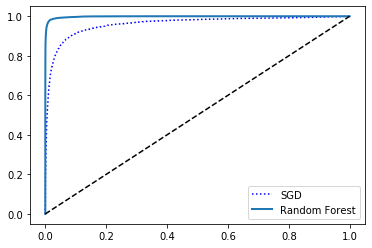

In [37]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [39]:
##Rnd Forest is much better!


In [40]:
#MULITCLASS CLASSIFICATION
# Two strategies: |One-vesus_One| and |One-versus-All(one-versus-the-rest)|
from sklearn.svm import SVC
svm_clf = SVC()

In [41]:
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [43]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)
print(np.argmax(some_digit_scores))
print(svm_clf.classes_)
print(svm_clf.classes_[5])

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
5
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
5


In [44]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())

In [ ]:
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

In [ ]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))
print(sgd_clf.decision_function([some_digit]))
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled - scaler.fit_transform(X_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

In [1]:
# TO:DO - Error analysis
y_train_pred = cross_val_predict(sgd_clf_X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mix)

NameError: name 'cross_val_predict' is not defined